### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 316_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,...,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,0.046907,0.529712,1.311798,1.543247,1.766602,4.041640,1.071388,1.019374,1.008974,1.019907,...,1.912382,2.055035,2.046556,1.789808,0.952853,1.988623,2.005207,1.991881,1.999604,41.560883
std,0.015122,0.021877,0.021962,0.011688,0.028341,1.123875,0.031352,0.006606,0.003867,0.012529,...,0.021625,0.015549,0.037806,0.097262,0.039652,0.012035,0.007655,0.003616,0.007971,13.652403
min,0.011006,0.448865,1.270627,1.504706,1.668616,0.940349,1.039872,1.004998,0.992030,1.000840,...,1.867798,1.987400,1.909041,1.471155,0.631147,1.952137,1.974222,1.975138,1.969781,21.700000
25%,0.038150,0.517468,1.297422,1.535366,1.751180,3.359052,1.052143,1.016502,1.006665,1.009584,...,1.898612,2.047535,2.042878,1.774133,0.930842,1.980301,2.003893,1.989980,1.995360,33.100000
50%,0.044215,0.528837,1.304356,1.540893,1.762130,3.959006,1.057658,1.021602,1.009751,1.021911,...,1.909719,2.058091,2.057122,1.819597,0.956716,1.989910,2.006932,1.992271,1.999439,38.800000
75%,0.049016,0.536978,1.322301,1.551277,1.790810,4.399087,1.078382,1.023602,1.011338,1.026543,...,1.921049,2.066052,2.069125,1.848208,0.980748,1.997178,2.009446,1.994096,2.003604,43.700000
max,0.111818,0.578650,1.371199,1.569342,1.842502,15.287915,1.243229,1.058634,1.026355,1.065205,...,2.001903,2.079216,2.079332,1.930109,1.054864,2.019834,2.024137,2.007985,2.038964,97.100000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

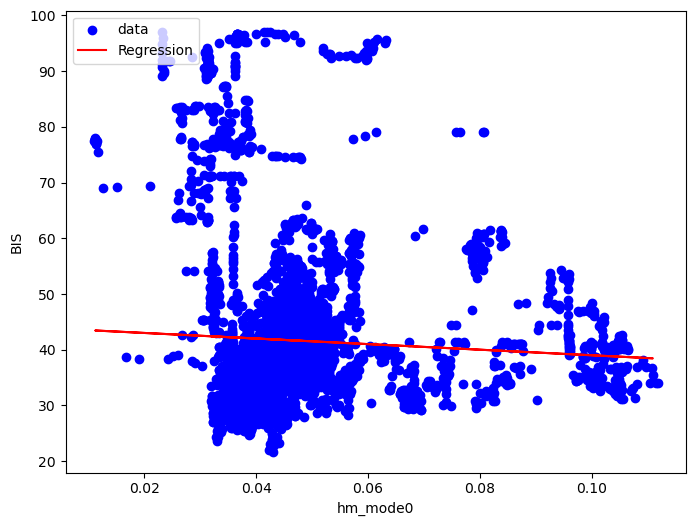

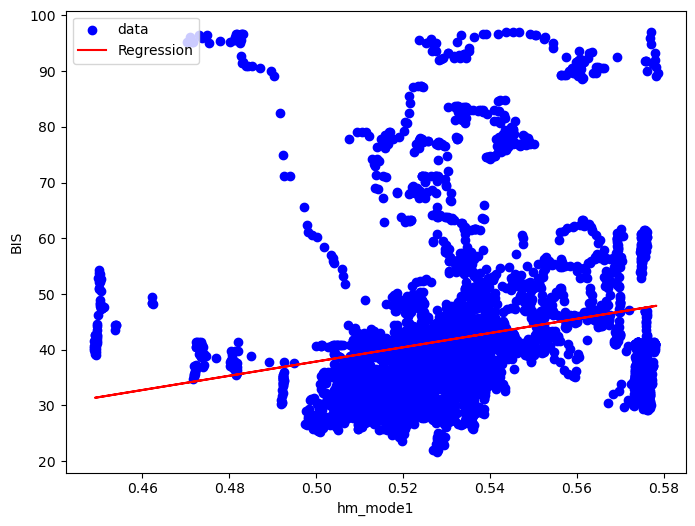

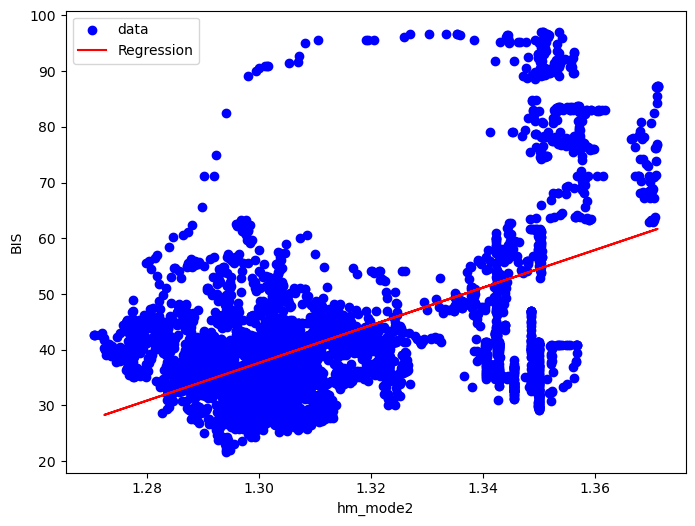

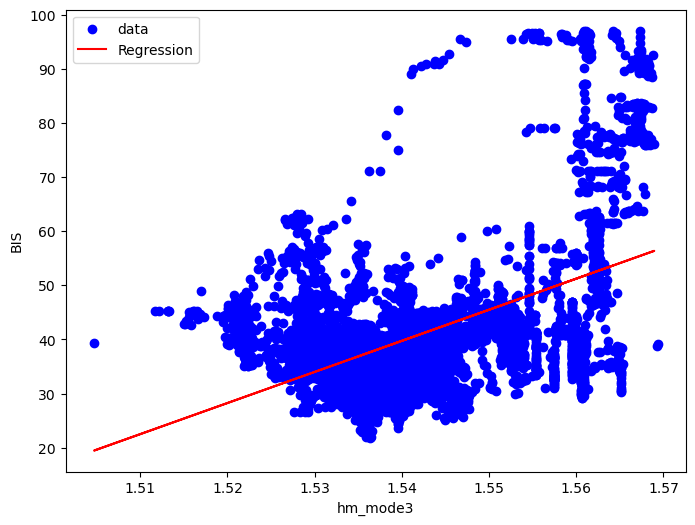

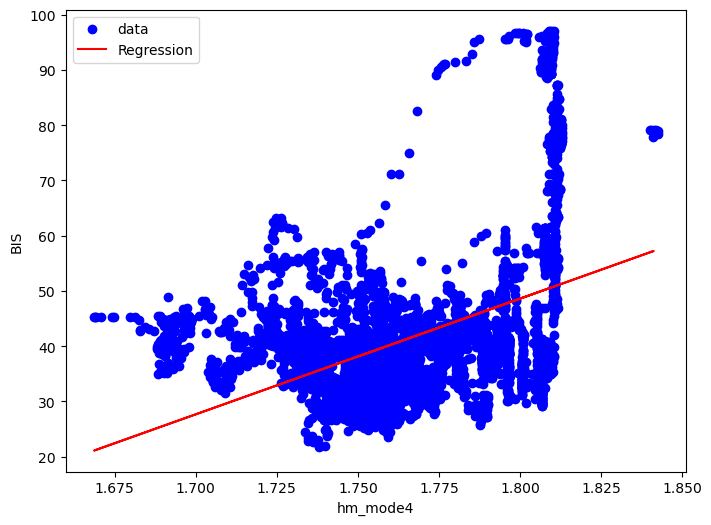

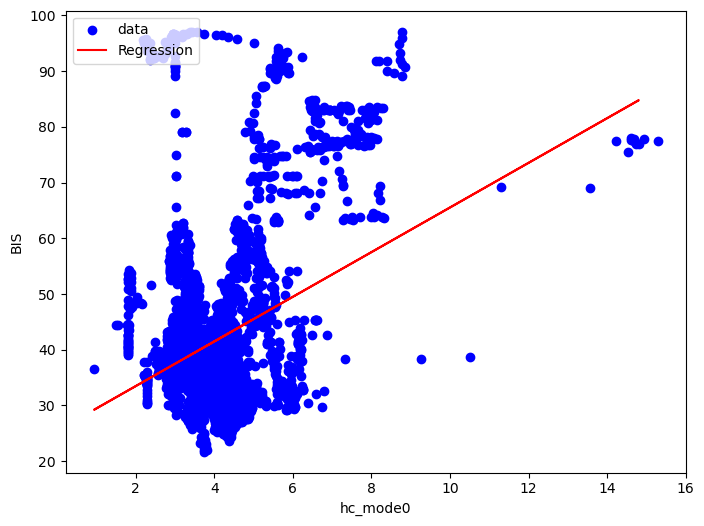

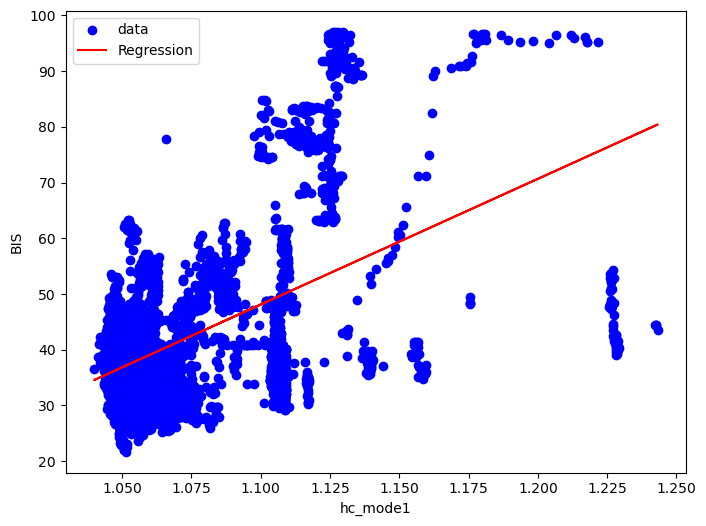

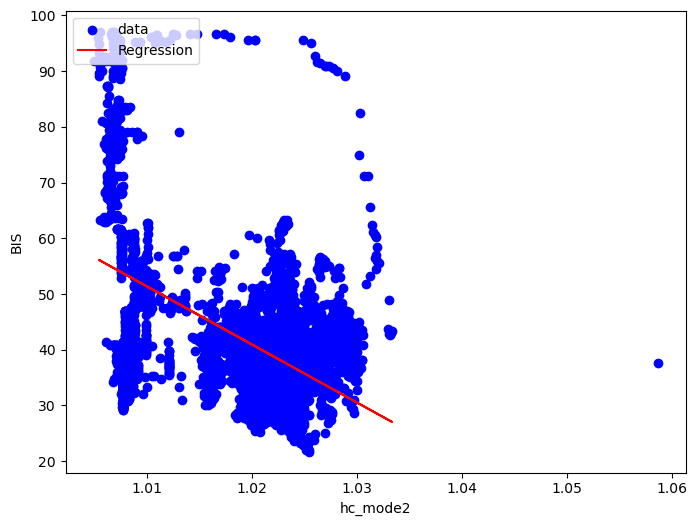

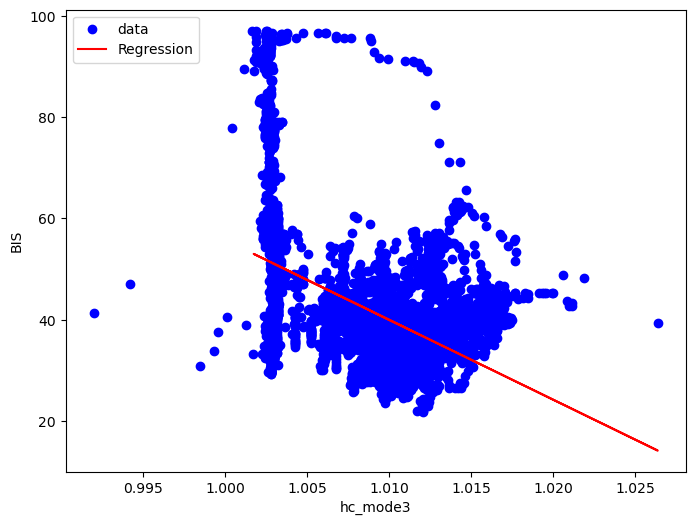

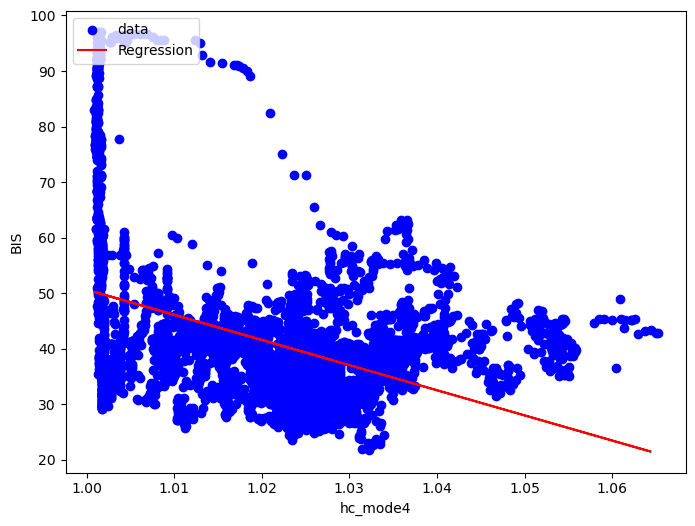

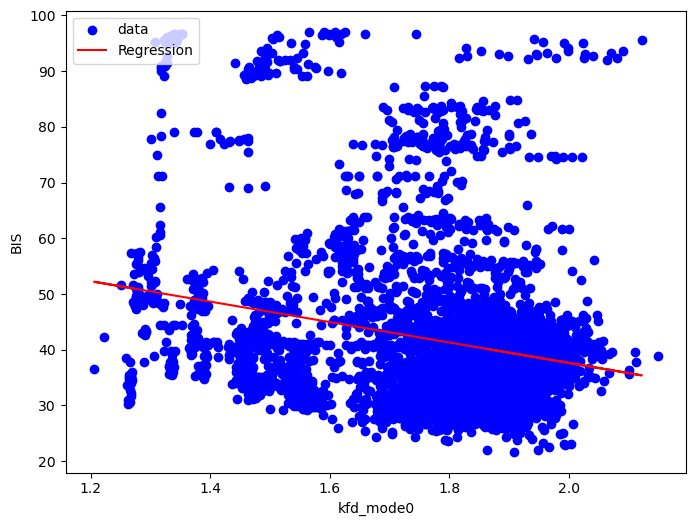

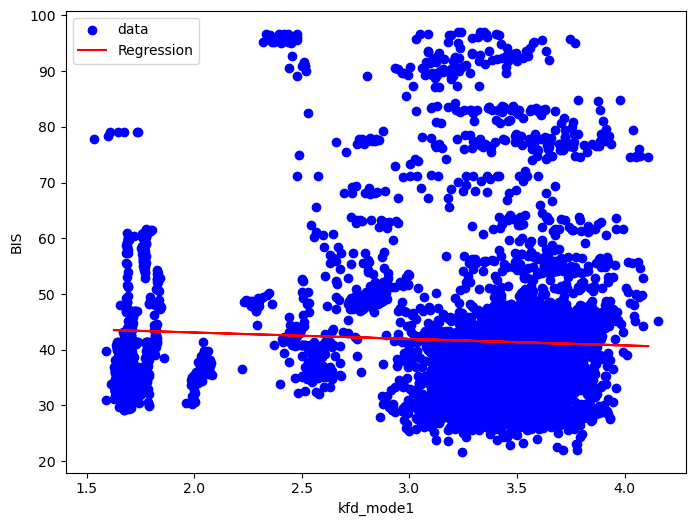

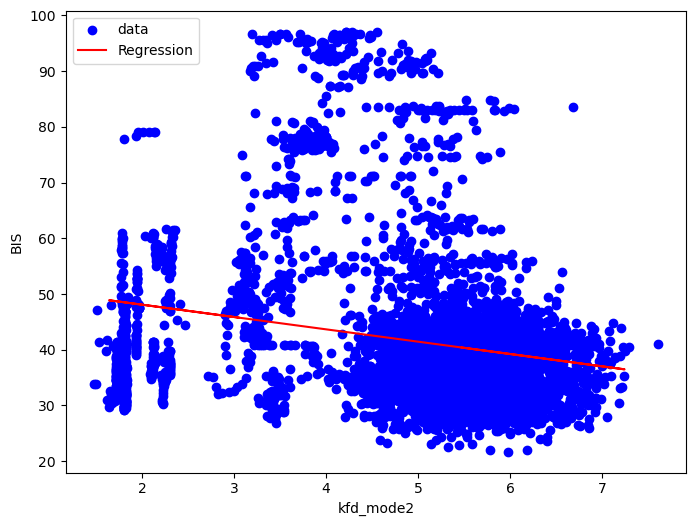

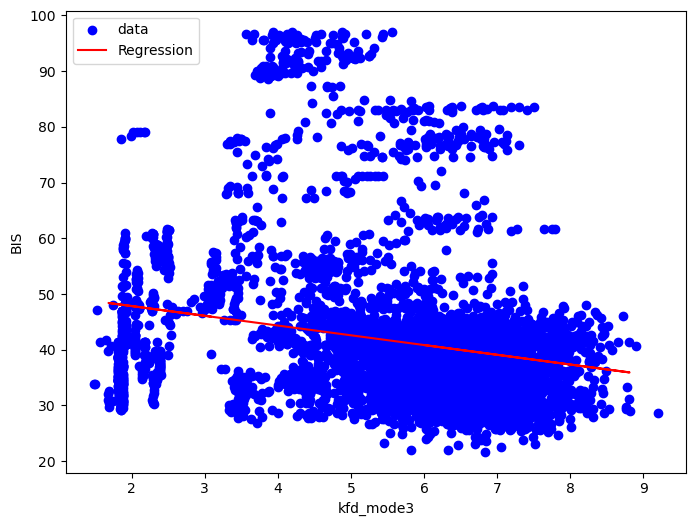

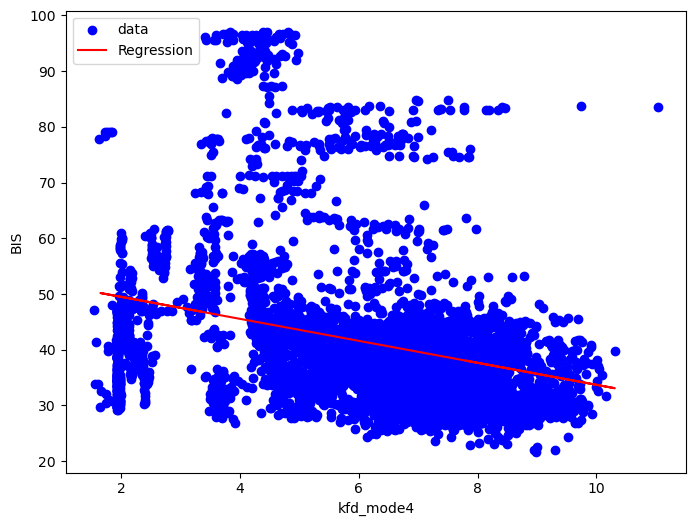

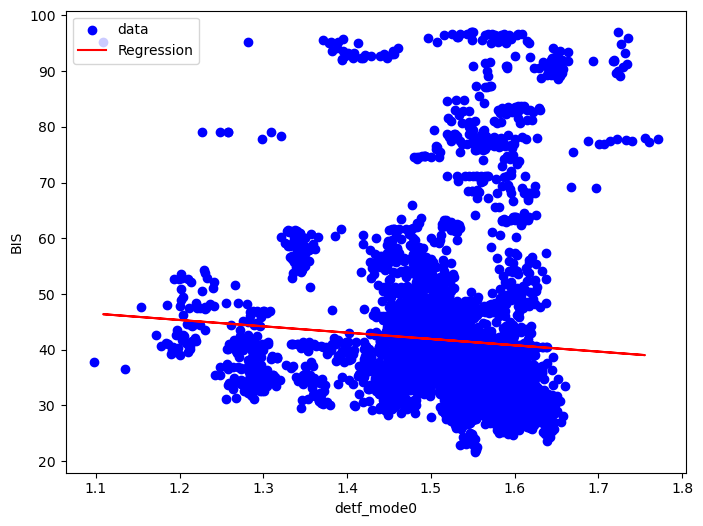

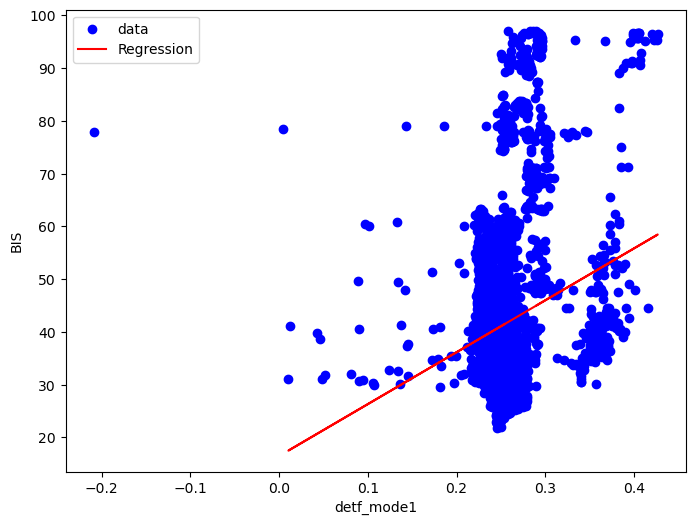

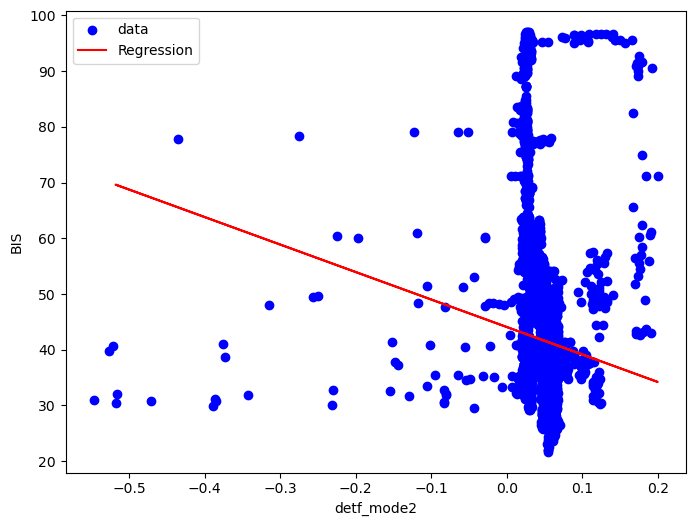

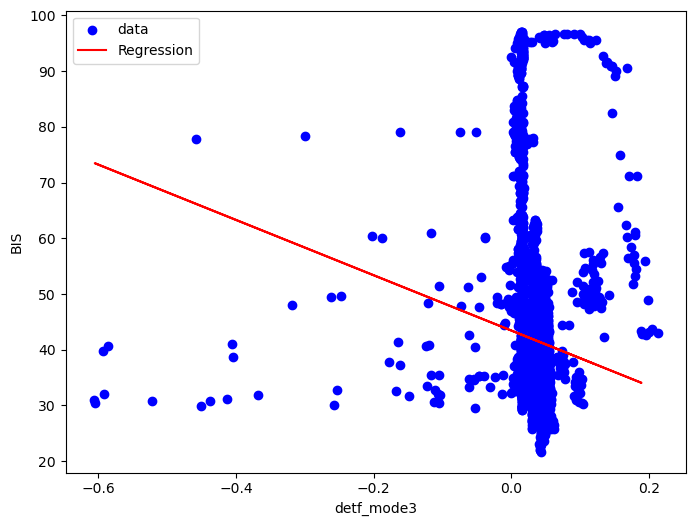

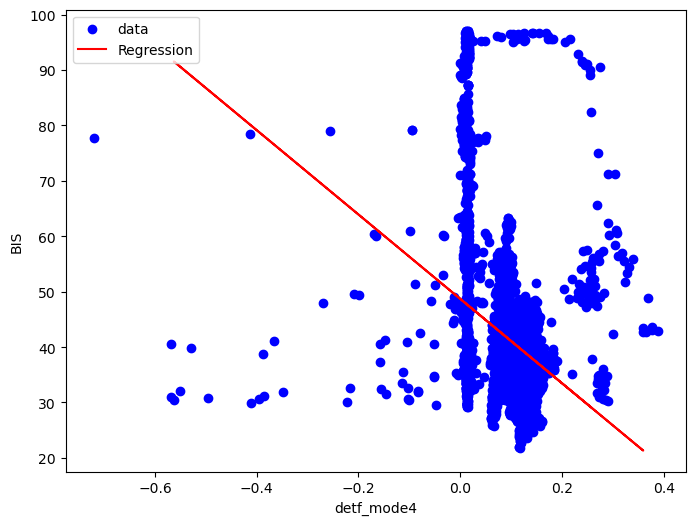

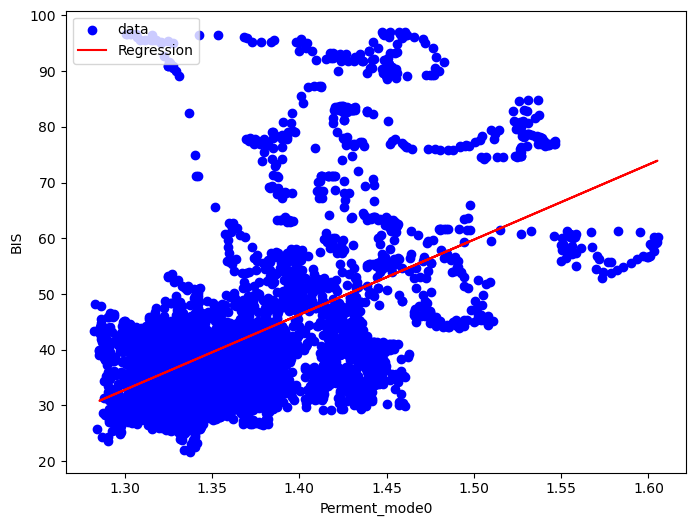

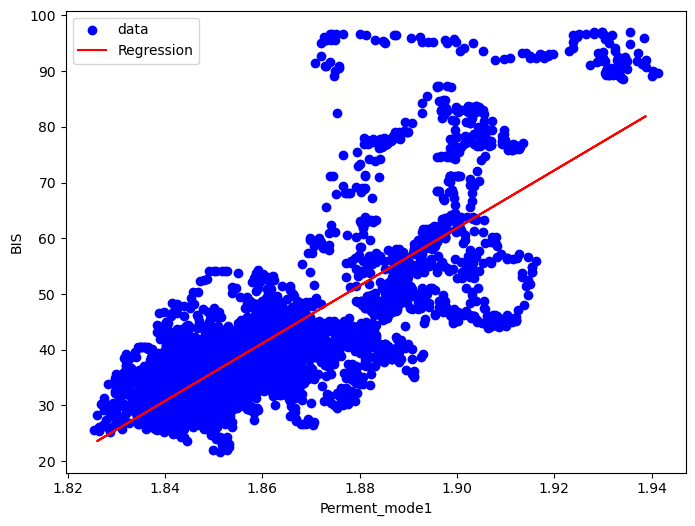

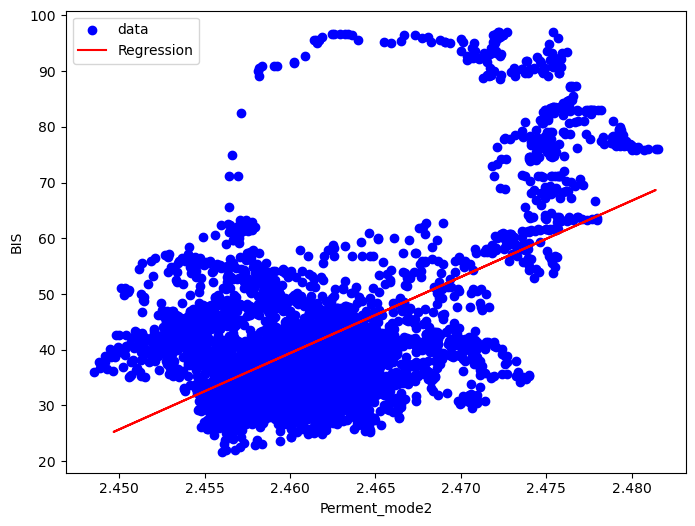

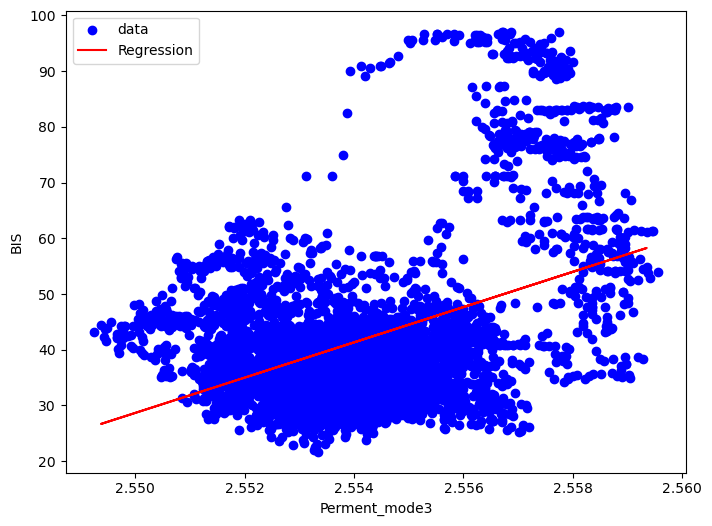

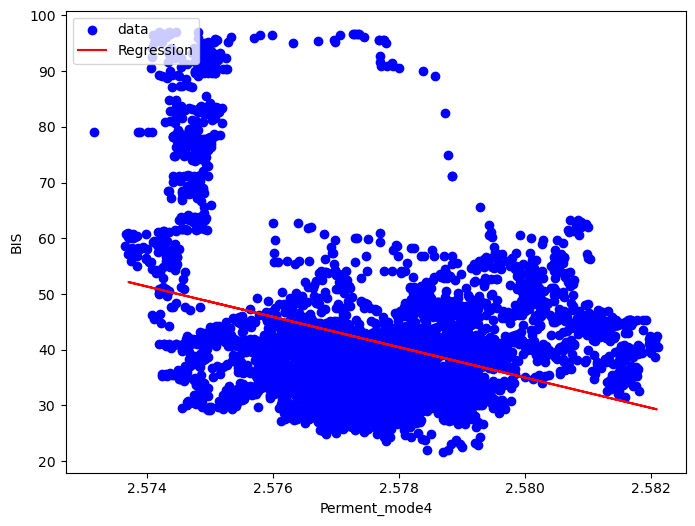

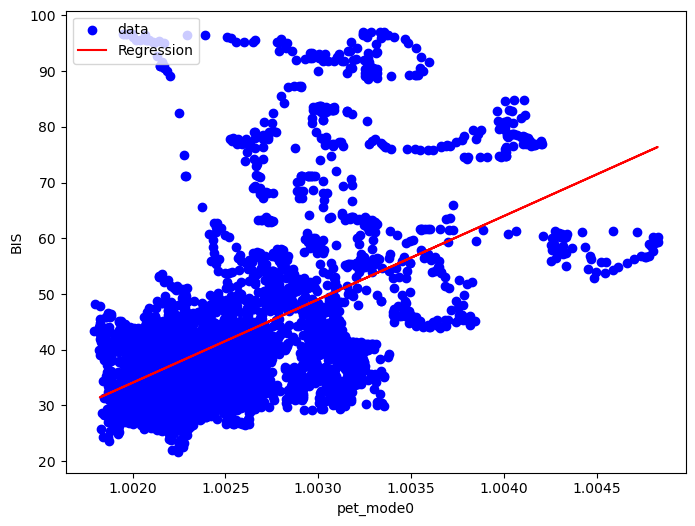

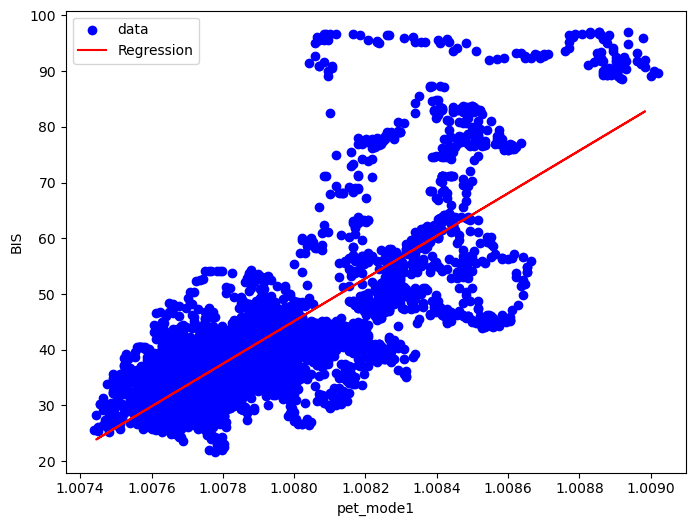

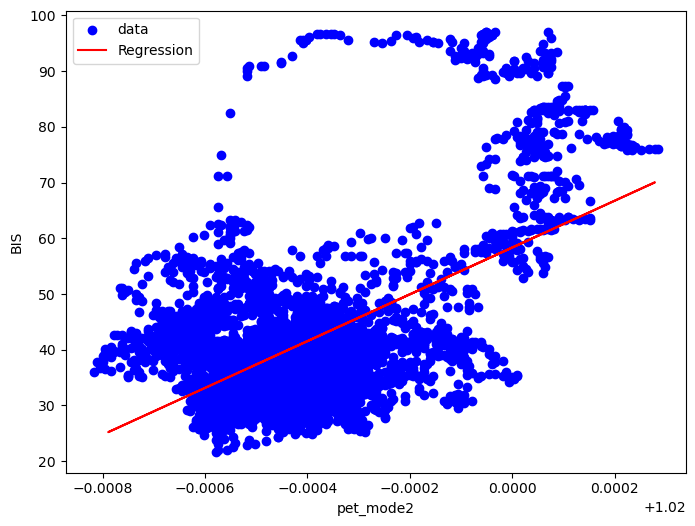

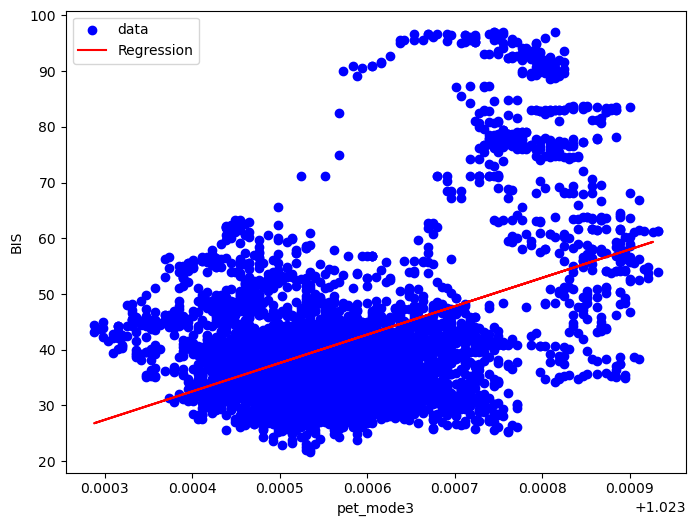

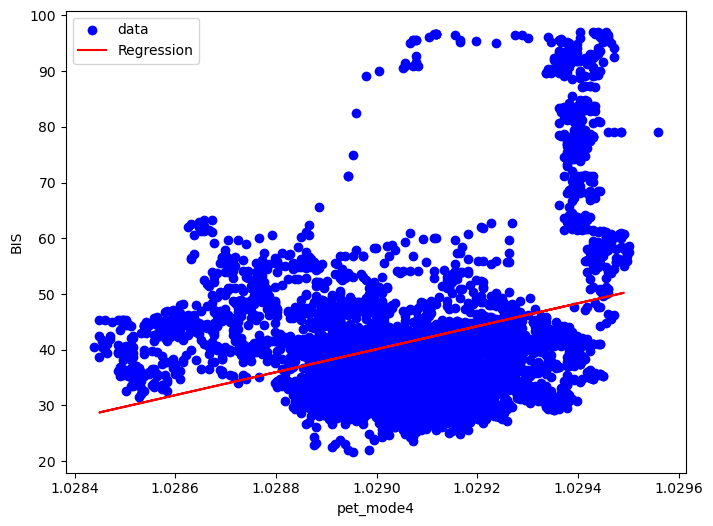

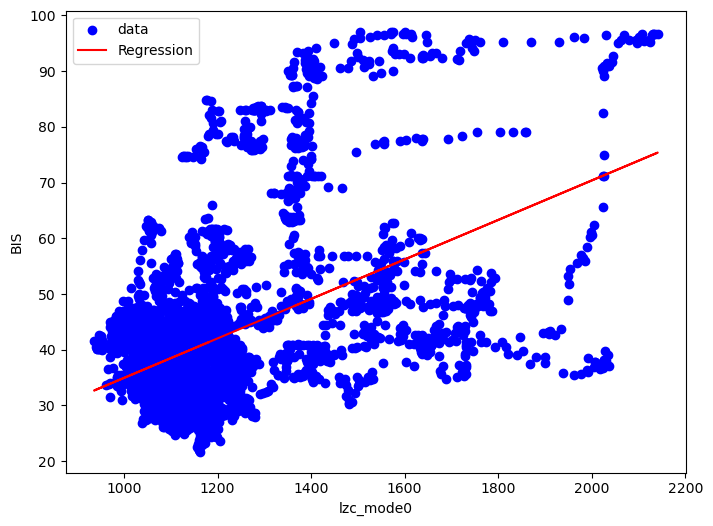

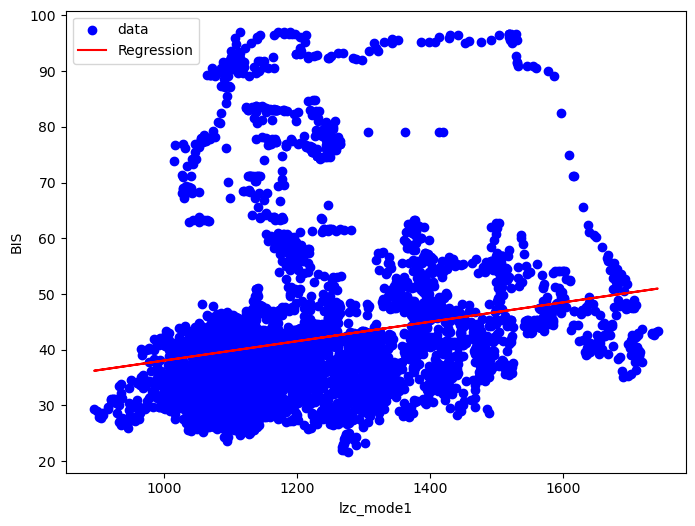

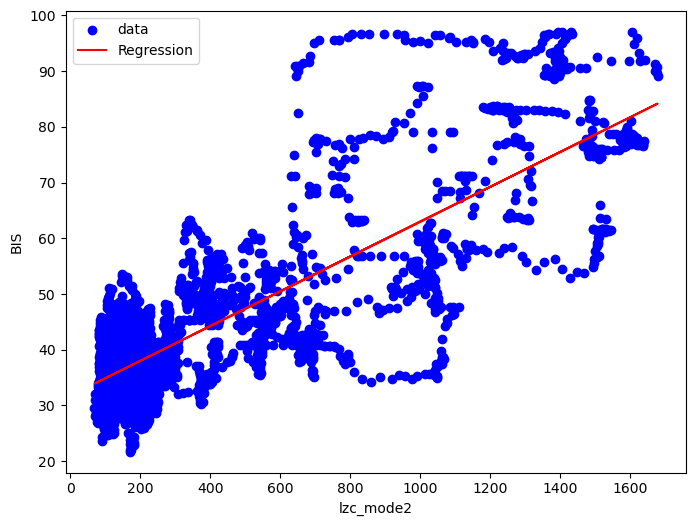

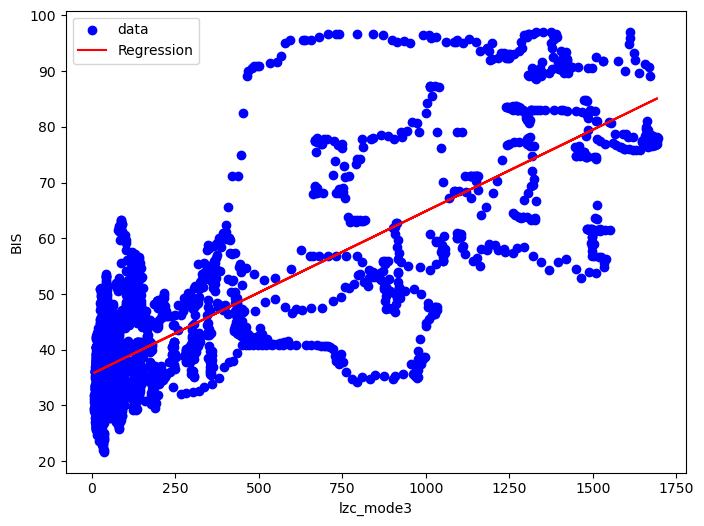

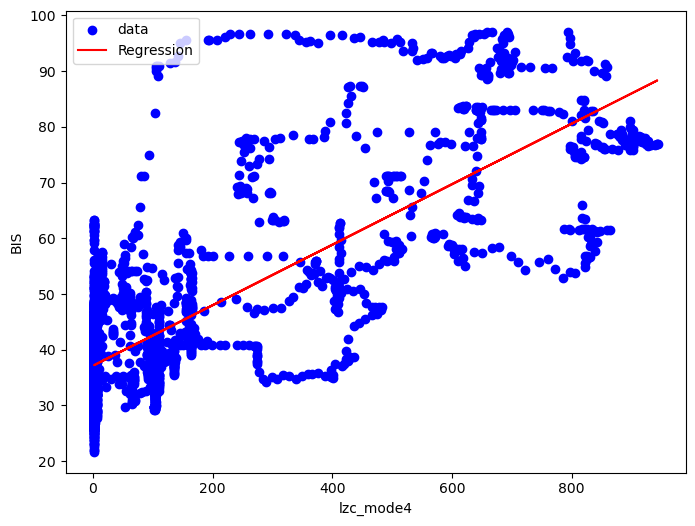

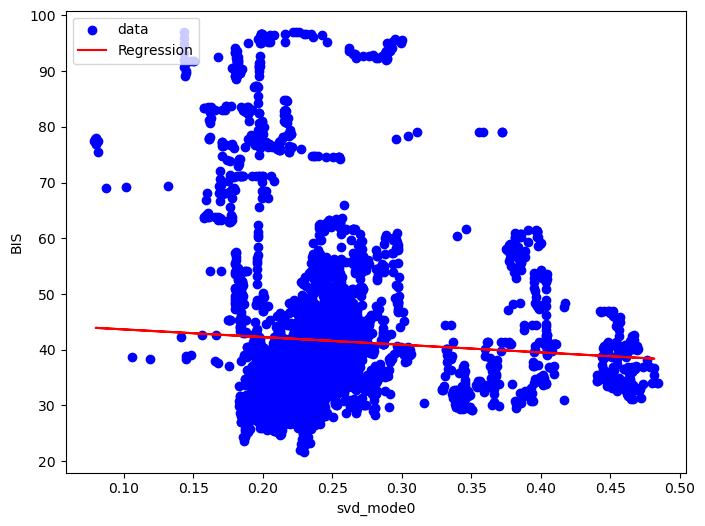

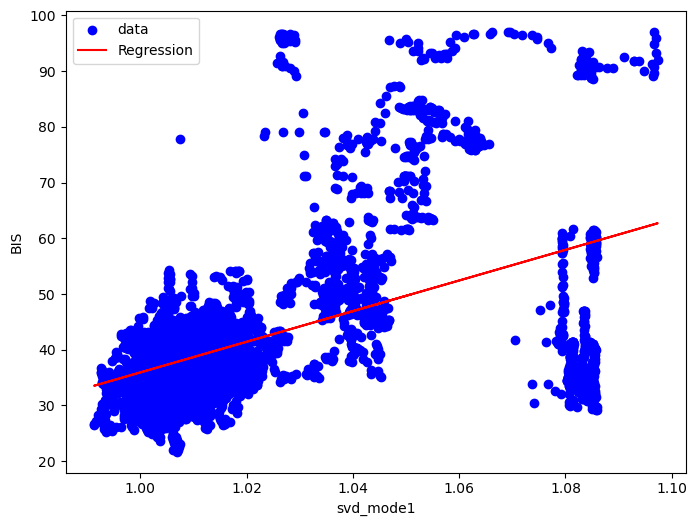

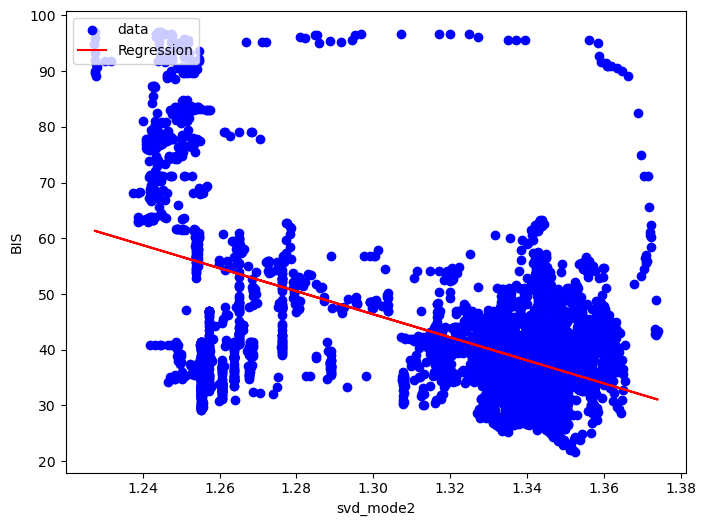

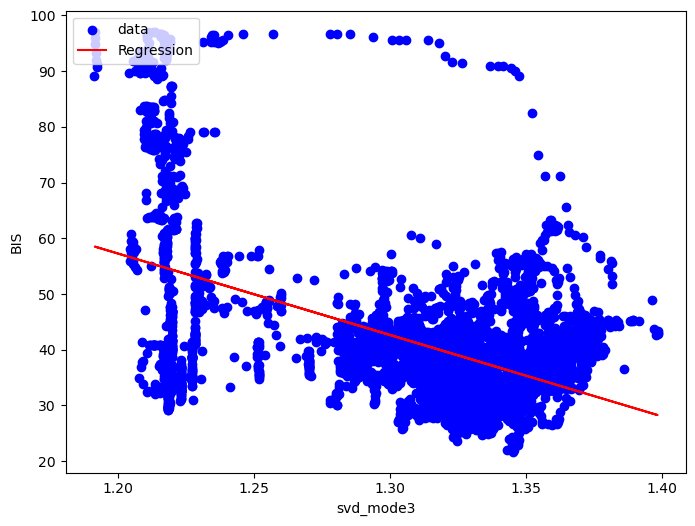

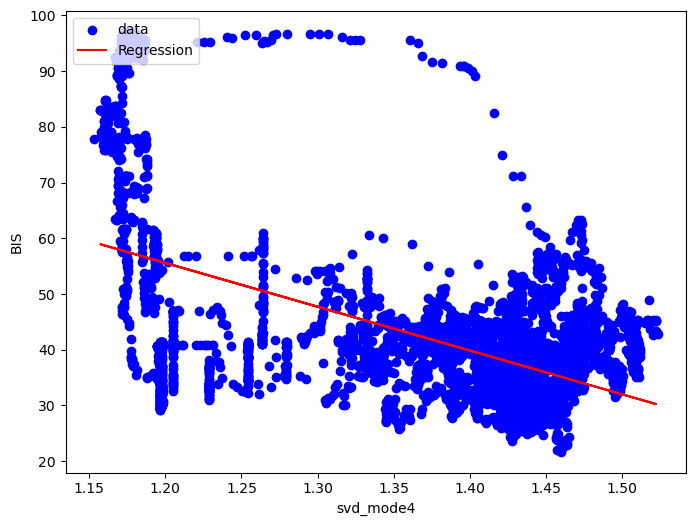

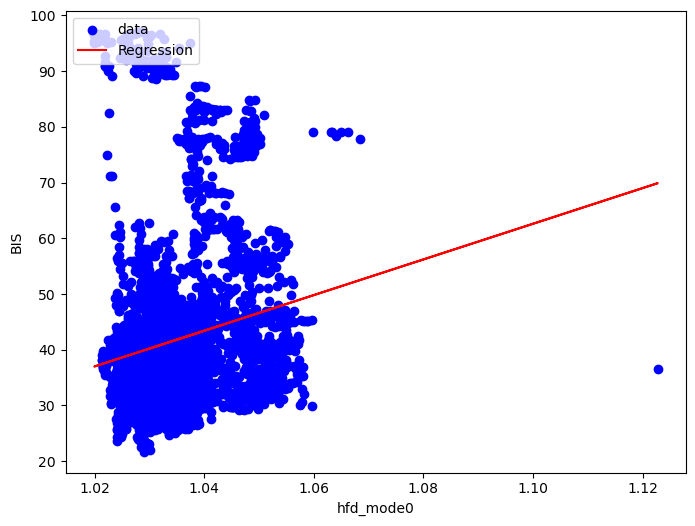

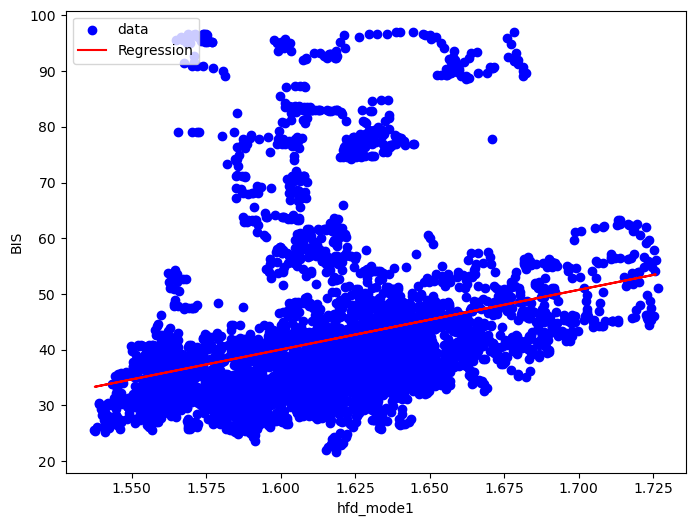

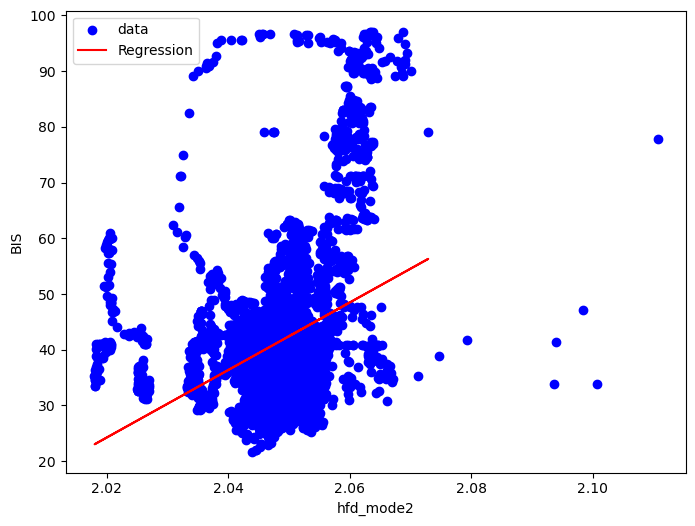

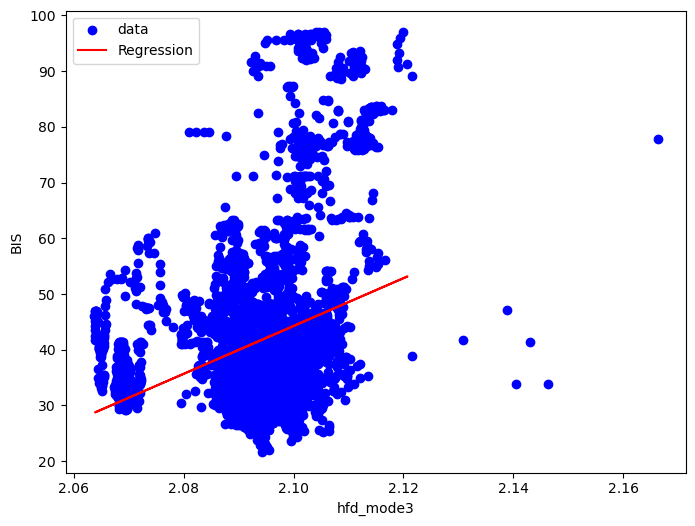

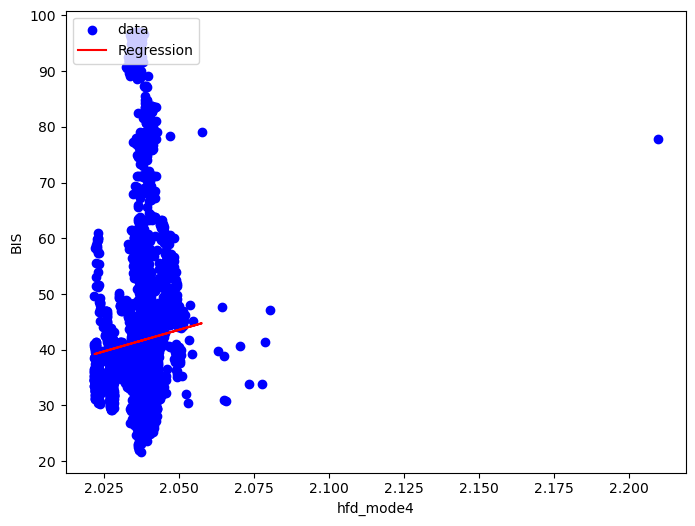

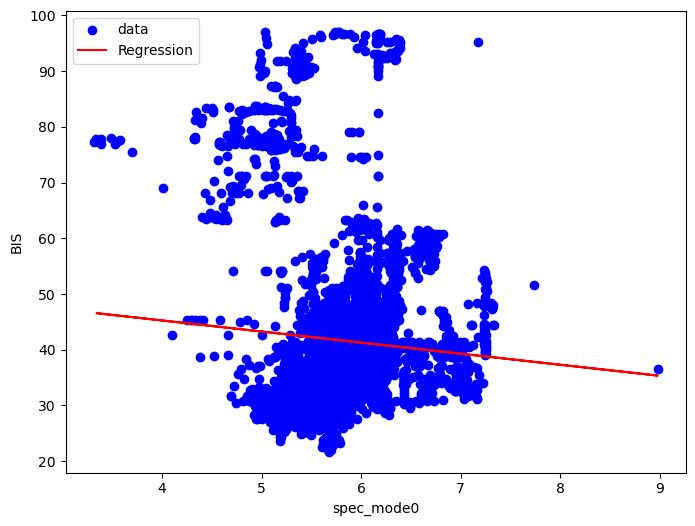

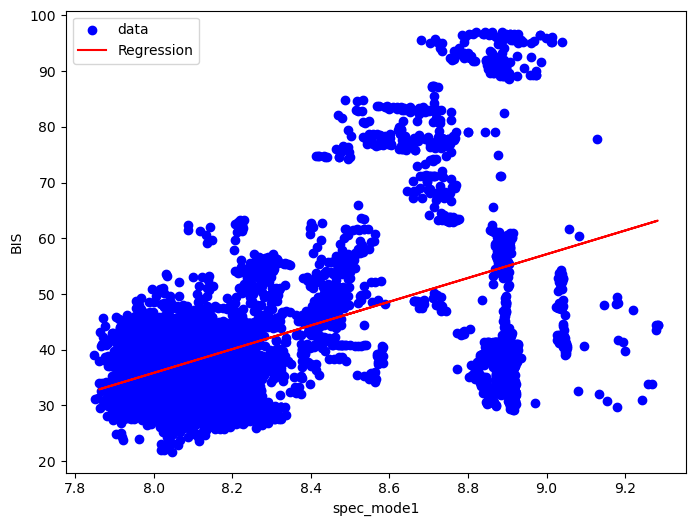

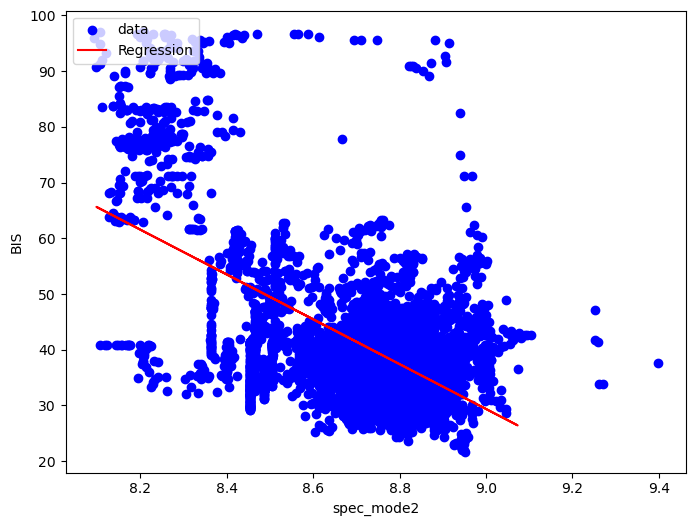

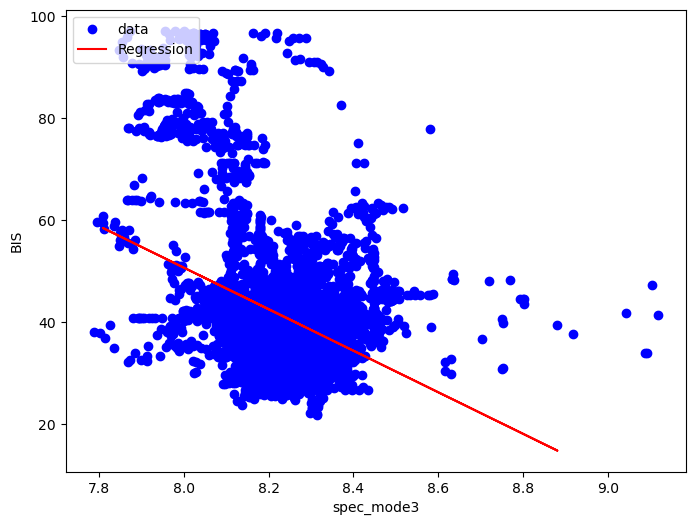

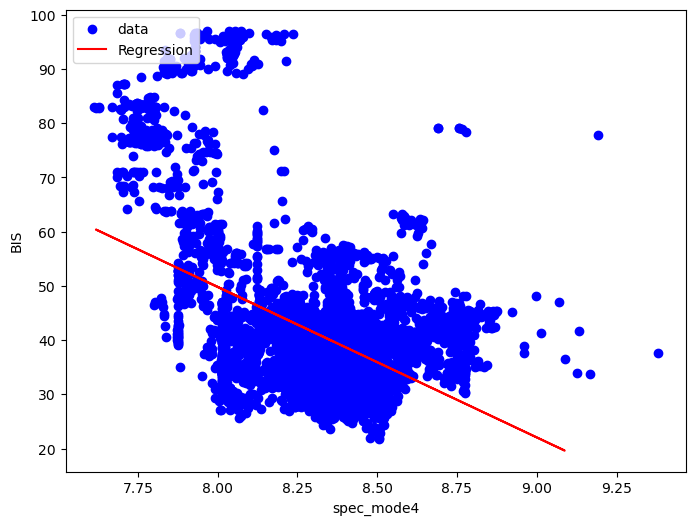

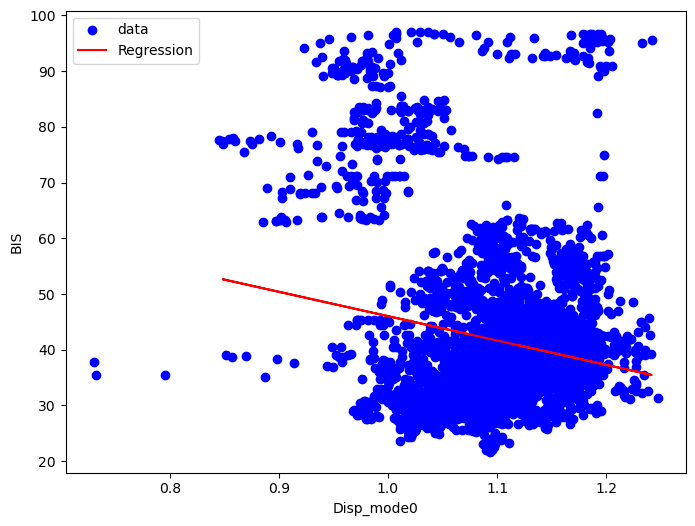

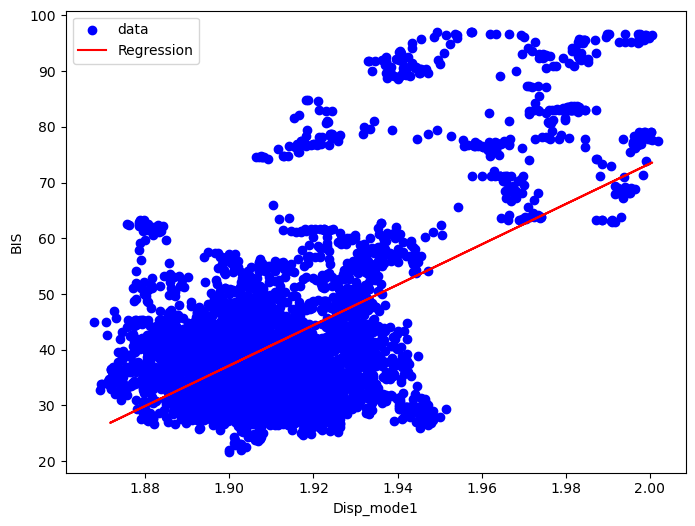

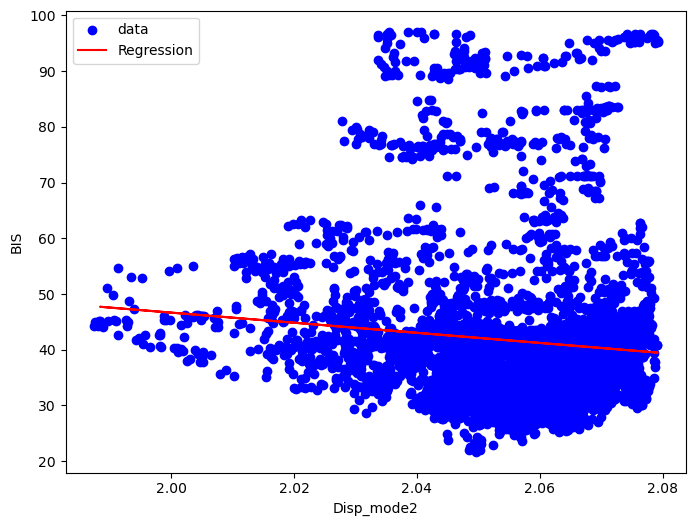

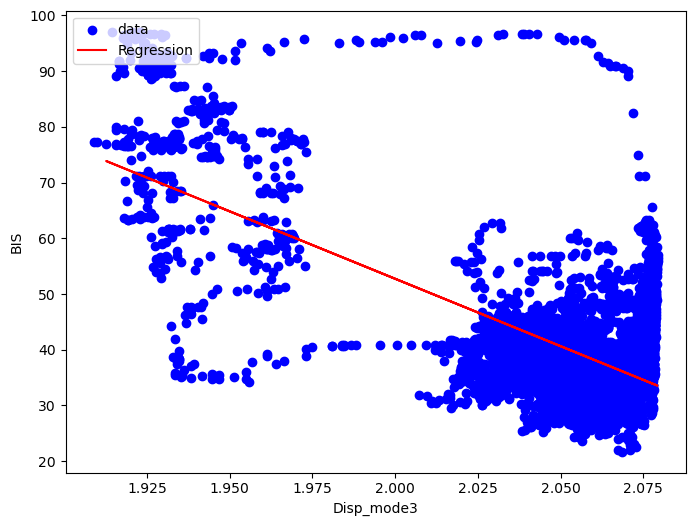

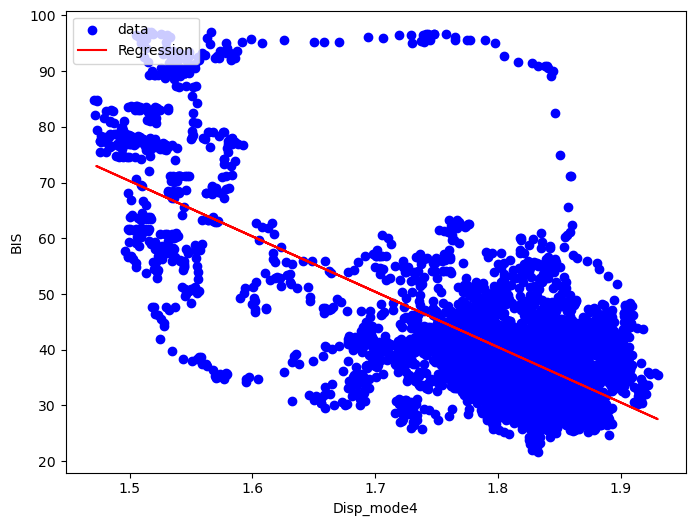

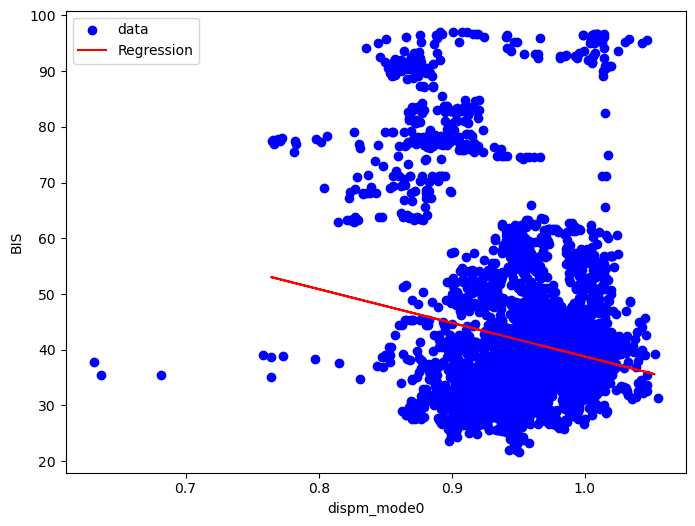

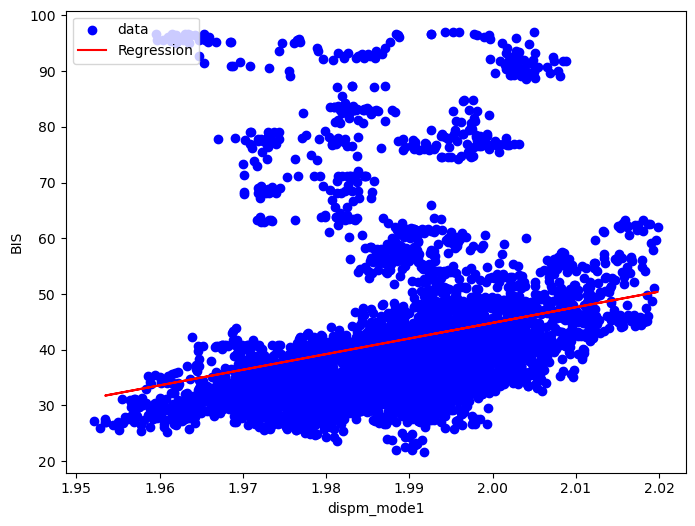

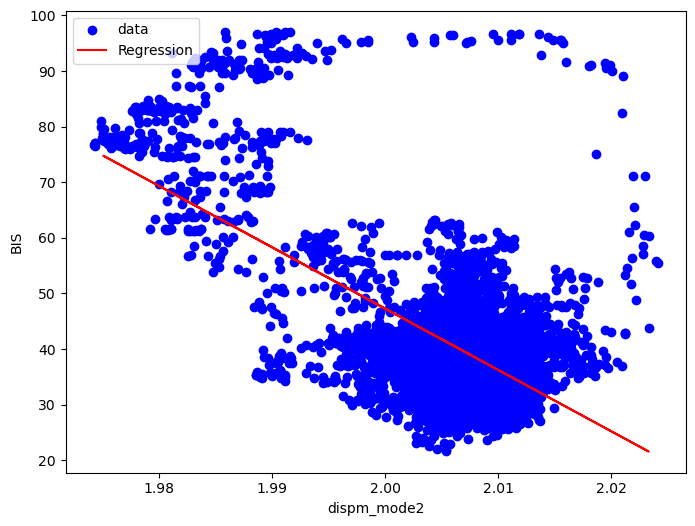

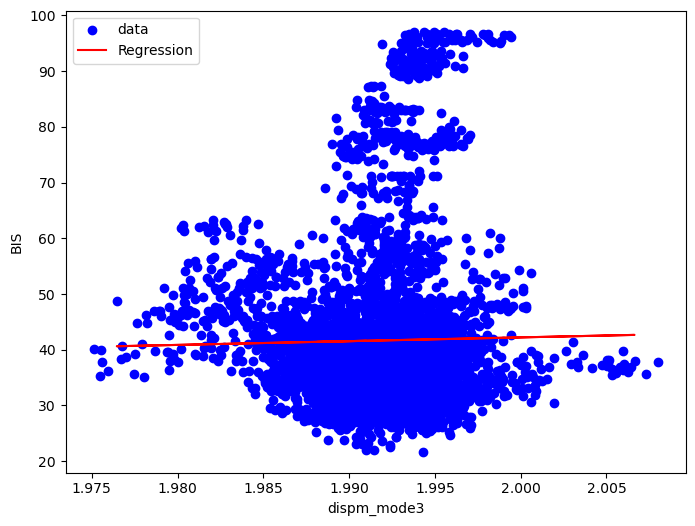

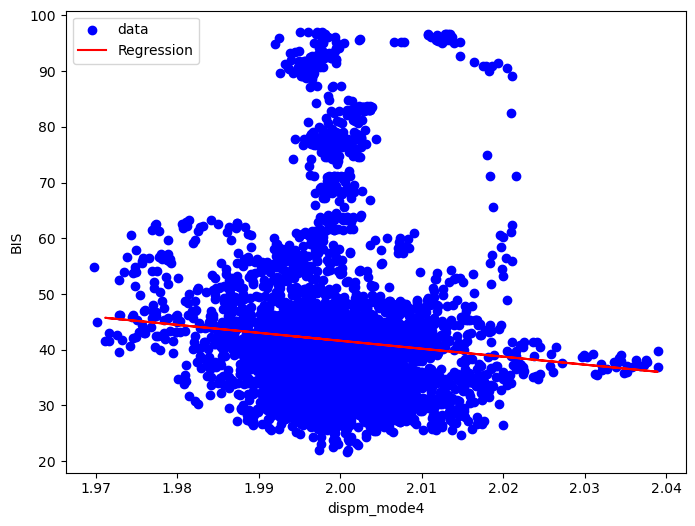

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
32,lzc_mode2_r2,66.332693
33,lzc_mode3_r2,65.028960
26,pet_mode1_r2,60.644019
21,Perment_mode1_r2,60.317603
34,lzc_mode4_r2,57.093875
54,Disp_mode4_r2,46.467206
53,Disp_mode3_r2,43.163118
51,Disp_mode1_r2,34.053945
57,dispm_mode2_r2,32.506237
27,pet_mode2_r2,30.140579


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
33      lzc_mode3    0.579245
6        hc_mode1    0.102304
32      lzc_mode2    0.061490
21  Perment_mode1    0.037494
39      svd_mode4    0.033423
40      hfd_mode0    0.019225
0        hm_mode0    0.016827
42      hfd_mode2    0.013620
51     Disp_mode1    0.011191
55    dispm_mode0    0.009496
56    dispm_mode1    0.007076
46     spec_mode1    0.006729
15     detf_mode0    0.006689
31      lzc_mode1    0.005404
41      hfd_mode1    0.004918
5        hc_mode0    0.004543
3        hm_mode3    0.004379
1        hm_mode1    0.004302
9        hc_mode4    0.004173
2        hm_mode2    0.004060
50     Disp_mode0    0.003729
26      pet_mode1    0.003679
30      lzc_mode0    0.003467
54     Disp_mode4    0.002855
45     spec_mode0    0.002671
24  Perment_mode4    0.002504
36      svd_mode1    0.002482
23  Perment_mode3    0.002189
53     Disp_mode3    0.002136
52     Disp_mode2    0.002124
29      pet_mode4    0.001732
20  Perment_mode0    0.001709
19     det